In [5]:
import requests
import json

from datetime import datetime, timedelta
from dateutil.parser import parse

In [6]:
API_URL = 'https://api.gopax.co.kr'

In [7]:
def get_asset_list():
    result = requests.get(API_URL + '/assets')
    return json.loads(result.text)

In [9]:
def get_trading_pairs():
    result = requests.get(API_URL + '/trading-pairs')
    return json.loads(result.text)

In [12]:
def get_ticker(trading_pair):
    result = requests.get(API_URL + '/trading-pairs/%s/ticker' % trading_pair)
    return json.loads(result.text)

In [30]:
def get_books(trading_pair):
    result = requests.get(API_URL + '/trading-pairs/%s/book' % trading_pair)
    return json.loads(result.text)

In [46]:
def get_recent_deals(trading_pair, limit, after, before):
    req = API_URL + '/trading-pairs/%s/trades' % trading_pair
    parameter = {'limit': limit, 'after': after, 'before': before}
    result = requests.get(req, params = parameter)
    return json.loads(result.text)

In [44]:
#시간을 내맘대로 적으면 알아서 잘라주는 함수 (parse)
def get_timestamp(date_string):
    return parse(date_string).timestamp()

In [55]:
def get_past_data(trading_pair, start, end, interval):
    req = API_URL + '/trading-pairs/%s/candles' % trading_pair
    parameter = {'start': start * 1000, 'end': end * 1000, 'interval': interval}
    result = requests.get(req, params = parameter)
    return json.loads(result.text)

In [71]:
past_data_1 = get_past_data('BTC-KRW', get_timestamp('2018-01-01 12:00'), get_timestamp('2018-10-01 13:00'), 1440)

In [72]:
data = np.array(past_data_1)
data[:, 3]

array([18937000., 18995000., 18819500., 18943500., 18970000., 20080000.,
       23999000., 25620500., 25900000., 26075000., 25509000., 23900000.,
       22382000., 19550000., 19799000., 21002000., 18989500., 15106000.,
       12600000., 14980000., 15039000., 16652000., 14396000., 13370000.,
       13250000., 13178500., 13120500., 12785500., 12954000., 13251000.,
       11499500., 11141000.,  8690000.,  9147500.,  9805000.,  8758500.,
        7750500.,  8661000.,  8428000.,  9500000.,  9950000.,  9999000.,
        9529500., 10125000.,  9899000., 10486000., 11385000., 11447000.,
       12347000., 11978500., 12666000., 13559500., 12804000., 11819500.,
       12063000., 11596500., 11284500., 11742000., 11972000., 11863500.,
       12195500., 12439500., 12800000., 12580000., 12730000., 12000000.,
       11189500., 10500000., 10397000.,  9864500., 10499500., 10225000.,
       10150000.,  9142000.,  9110500.,  9075000.,  8658000.,  8994500.,
        9715000.,  9827500.,  9936500.,  9777000., 

In [73]:
data.shape

(274, 6)

In [74]:
import matplotlib.pyplot as plt

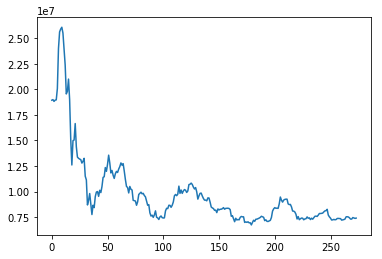

In [75]:
#open가격 그래프로 나타내기
plt.plot(data[:, 3])